###  Predict Online Payment Fraud

This is a binary classification task to predict if online payments are fraudulent or not

### Data Dictionary

*step: represents a unit of time where 1 step equals 1 hour

*type: type of online transaction

*amount: the amount of the transaction

*nameOrig: customer starting the transaction

*oldbalanceOrg: balance before the transaction

*newbalanceOrig: balance after the transaction

*nameDest: recipient of the transaction

*oldbalanceDest: initial balance of recipient before the transaction

*newbalanceDest: the new balance of recipient after the transaction

*isFraud: fraud transaction

In [1]:
#import pandas and numpy for data manipulation
import pandas as pd
import numpy as np

#import pyplot and seaborn for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
#load online payment data into a pandas dataframe and check the first 5 rows of the data
fraud_data = pd.read_csv(r'C:\Users\Owner\Desktop\OnlinePayment.csv')
fraud_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [5]:
# check the shape of the dataframe
fraud_data.shape

(1048575, 10)

In [6]:
# Check the data types of the labels
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [7]:
# check summary statistics
fraud_data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00


In [8]:
# Check for missing values in each column
fraud_data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [9]:
# check for unique values in type column
fraud_data.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [10]:
# Check for unique values in isFraud column
fraud_data.isFraud.unique()

array([0, 1], dtype=int64)

In [12]:
fraud_data.isFraud.value_counts()

0    1047433
1       1142
Name: isFraud, dtype: int64

In [11]:
# This counts the unique values in the column
tran_type= fraud_data.type.value_counts().sort_index(ascending=True)
tran_type

CASH_IN     227130
CASH_OUT    373641
DEBIT         7178
PAYMENT     353873
TRANSFER     86753
Name: type, dtype: int64

The data provided is in a csv file containing 1048575 records from Blossom Bank. There are no missing values in the data 

In [12]:
#check distribution of values in the target column. Use value_counts(normalize=True)
fraud_data.isFraud.value_counts(normalize=True)

0    0.998911
1    0.001089
Name: isFraud, dtype: float64

In [13]:
pay = fraud_data.groupby('type')['type'].count()
pay

type
CASH_IN     227130
CASH_OUT    373641
DEBIT         7178
PAYMENT     353873
TRANSFER     86753
Name: type, dtype: int64

### Exploratory Data Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

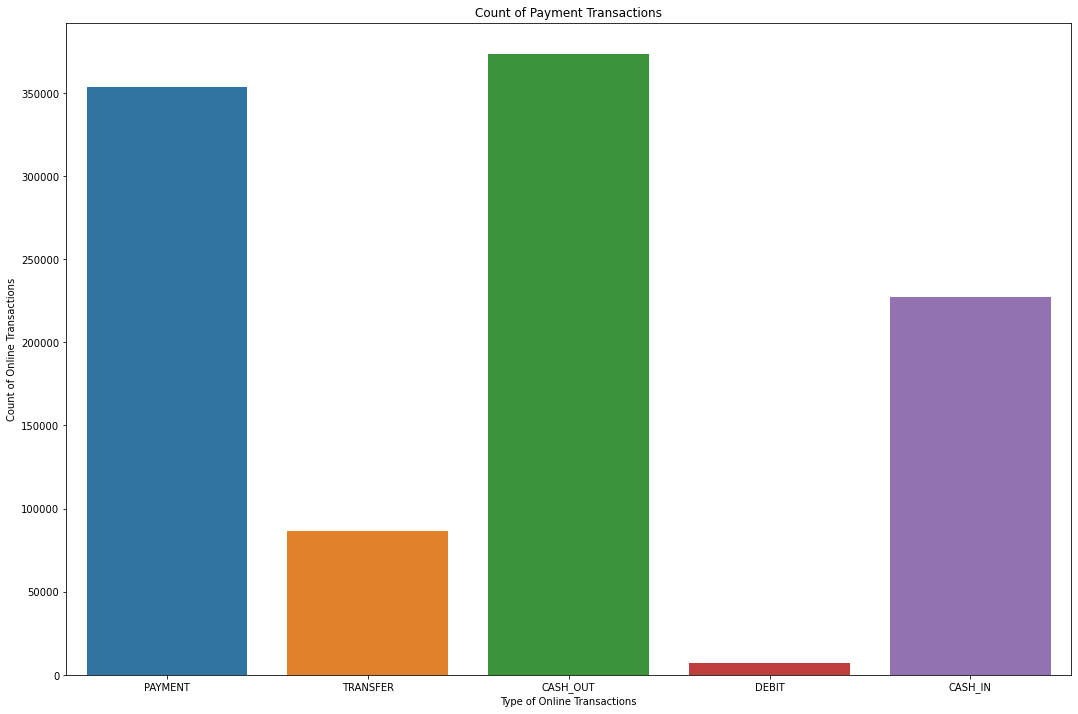

In [14]:
# what is the count of the payment transactions
plt.figure(figsize=(18,12))
plt.title('Count of Payment Transactions')
sns.countplot(x='type',data=fraud_data) 

plt.xlabel('Type of Online Transactions')
plt.ylabel('Count of Online Transactions')
plt.show

In the chart above, we can see that CASH_OUT has the highest count with 373641, followed by PAYMENT with count 353873. DEBIT has the lowest count with 7178.

<function matplotlib.pyplot.show(close=None, block=None)>

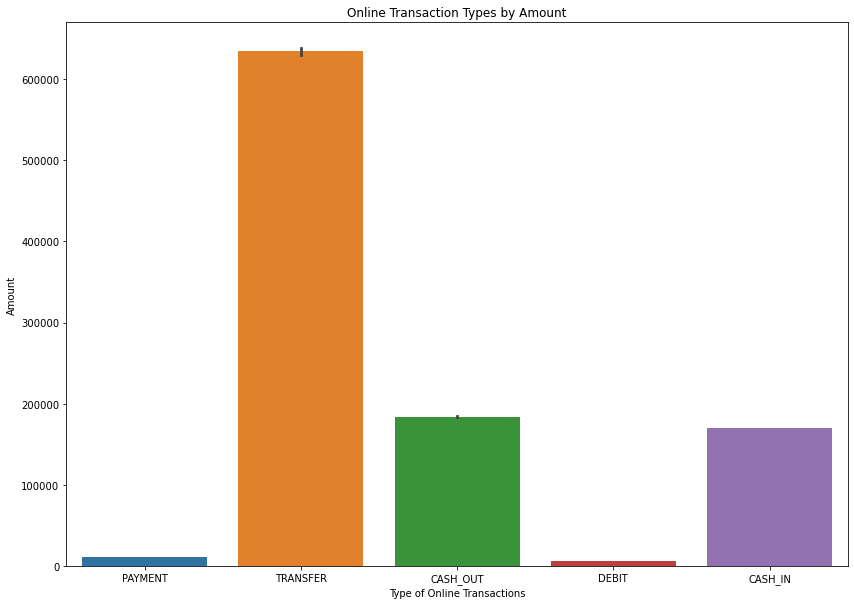

In [15]:
# Type of Online Transaction Vs Amount
plt.figure(figsize=(14,10))
plt.title('Online Transaction Types by Amount')
sns.barplot(x= 'type',y = 'amount',data=fraud_data)
plt.xlabel('Type of Online Transactions')
plt.ylabel('Amount')
plt.show

We can see that TRANSFER generated the highest amount, followed by CASH_OUT.PAYMENT and DEBIT generated the least amount.

In [52]:
fraud_data.groupby('type')['isFraud'].value_counts()

type      isFraud
CASH_IN   0          227130
CASH_OUT  0          373063
          1             578
DEBIT     0            7178
PAYMENT   0          353873
TRANSFER  0           86189
          1             564
Name: isFraud, dtype: int64

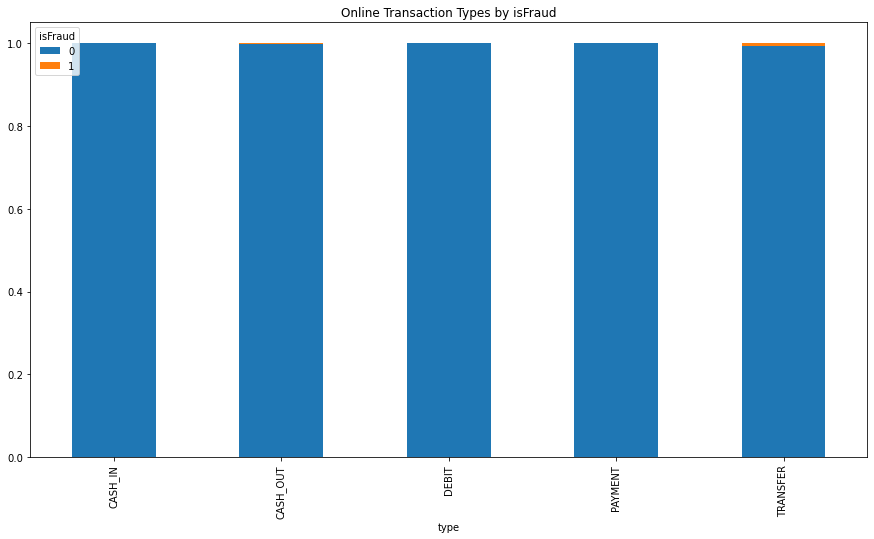

In [51]:
#create pivot of type of online transaction and fraud
type_fraud_pivot = pd.crosstab(fraud_data.type,fraud_data.isFraud,normalize='index')

#plot the data
type_fraud_pivot.plot.bar(stacked=True, figsize=(15,8))

plt.title('Online Transaction Types by isFraud')
plt.show()

In the barchart above, we can see that transaction types CASH_OUT and TRANSFER were used to make both fraudulent and non-fraudulent transactions with counts 578 and 564 respectively, while transaction types CASH_IN,DEBIT and PAYMENT were used to make only non-fraudulent transactions.

<AxesSubplot:>

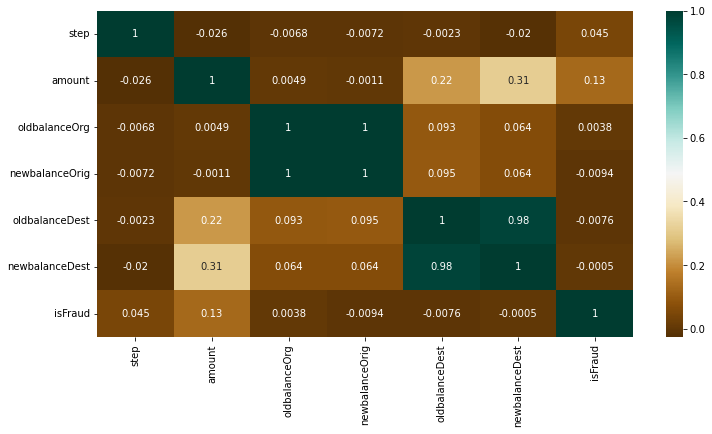

In [16]:
# compare relationships between the features
plt.figure(figsize=(12,6))
sns.heatmap(fraud_data.corr(),cmap='BrBG',annot=True)

In [55]:
fraud_data.corr().head(7)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,-0.025996,-0.006780,-0.007180,-0.002251,-0.019503,0.045030
amount,-0.025996,1.000000,0.004864,-0.001133,0.215558,0.311936,0.128862
oldbalanceOrg,-0.006780,0.004864,1.000000,0.999047,0.093305,0.064049,0.003829
newbalanceOrig,-0.007180,-0.001133,0.999047,1.000000,0.095182,0.063725,-0.009438
oldbalanceDest,-0.002251,0.215558,0.093305,0.095182,1.000000,0.978403,-0.007552
newbalanceDest,-0.019503,0.311936,0.064049,0.063725,0.978403,1.000000,-0.000495
isFraud,0.045030,0.128862,0.003829,-0.009438,-0.007552,-0.000495,1.000000


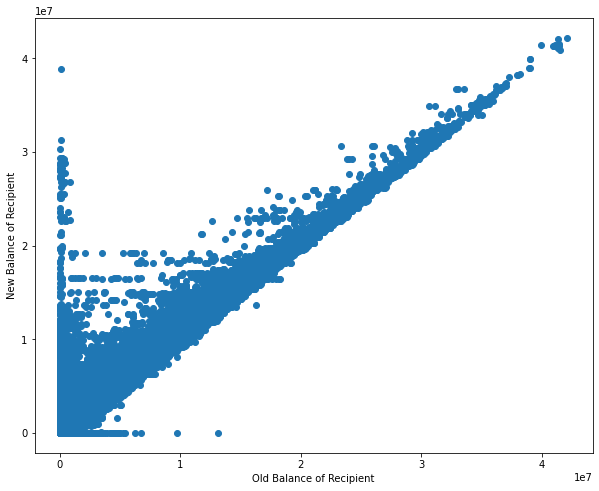

In [30]:
# plot a scatterplot of Old balance Destination and New balance Destination
plt.figure(figsize=(10,8))
plt.scatter(fraud_data.oldbalanceDest,fraud_data.newbalanceDest)
plt.ylabel("New Balance of Recipient")
plt.xlabel("Old Balance of Recipient")
plt.show()

In the plot above, we can see that there is a positive relationship between the Old Balance of Recipients and New Balance of Recipients.

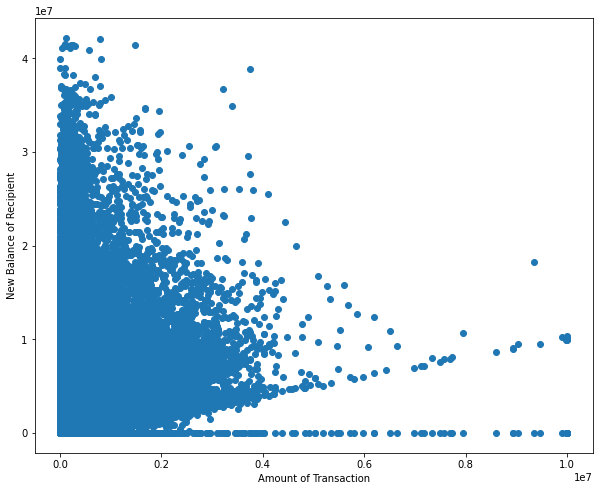

In [32]:
# plot a scatter plot New Balance Destination and Amount
plt.figure(figsize=(10,8))
plt.scatter(fraud_data.amount,fraud_data.newbalanceDest)
plt.ylabel("New Balance of Recipient")
plt.xlabel("Amount of Transaction")
plt.show()

There is a negative relationship between the amount of the transaction and the new balance of the recipient

### Feature Engineering

### One-Hot Encoding

With One-Hot Encoding, we convert categorical data to numerical


In [35]:
# select the categorical variable
# use pd.get_dummies() to one hot encode the categorical variable.

new_type = pd.get_dummies(fraud_data['type'])

# view what u have done

new_type.head()


,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0


In [36]:
#join the encoded variable back to the main dataframe using pd.concat()
#pass both fraud_data and new_type as a list of their names


fraud_data = pd.concat([fraud_data,new_type], axis=1)

#check what you have done
print(fraud_data.shape)
fraud_data.head()

(1048575, 15)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,1,0


In [37]:
#remove the initial categorical column 'type' and other irrelevant information such as 'nameOrig' and 'nameDest'.
fraud_data = fraud_data.drop(['type','nameOrig','nameDest'],axis=1)

In [38]:
print(fraud_data.shape)
fraud_data.head()

(1048575, 12)


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,1,0


### Choose your Target

In [39]:
X = fraud_data.drop('isFraud',axis=1)
y = fraud_data.isFraud

### Preparing Models

In [52]:
#import the libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [41]:
#split into training and validation sets using a 40% split ratio
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4)

In [43]:
# initialize models
LR = LogisticRegression()
DC = DecisionTreeClassifier()
RF = RandomForestClassifier()

In [44]:
#create list of your model names
models = [LR,DC,RF]

In [45]:
#create function to train a model and evaluate accuracy
def trainer(model,X_train,y_train,X_test,y_test):
    #fit your model
    model.fit(X_train,y_train)
    #predict on the fitted model
    prediction = model.predict(X_test)
    #print evaluation metric
    print('\nFor {}, Accuracy score is {} \n'.format(model.__class__.__name__,accuracy_score(prediction,y_test)))
    #print(classification_report(prediction,y_test)) #use this later

In [46]:
#loop through each model, training in the process
for model in models:
    trainer(model,X_train,y_train,X_test,y_test)


For LogisticRegression, Accuracy score is 0.9990057935769974 


For DecisionTreeClassifier, Accuracy score is 0.9995994564051213 


For RandomForestClassifier, Accuracy score is 0.9997782705099778 



In [48]:
dev_preds = LR.predict(X_train)

In [49]:
#development performance
print(classification_report(y_train,dev_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    628439
           1       0.55      0.34      0.42       706

    accuracy                           1.00    629145
   macro avg       0.78      0.67      0.71    629145
weighted avg       1.00      1.00      1.00    629145



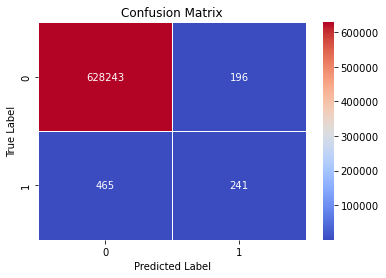

In [53]:
# check prediction accuracy with a confusion matrix
cm = confusion_matrix(y_train, dev_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm,
cmap='coolwarm',
linecolor='white',
linewidths=1,
annot=True,
fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [47]:
# Make Predictions
prediction1=LR.predict(X_test)
prediction2=DC.predict(X_test)
prediction3=RF.predict(X_test)

In [54]:
# Create a classification report
print(classification_report(y_test,prediction1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    418994
           1       0.53      0.34      0.42       436

    accuracy                           1.00    419430
   macro avg       0.77      0.67      0.71    419430
weighted avg       1.00      1.00      1.00    419430



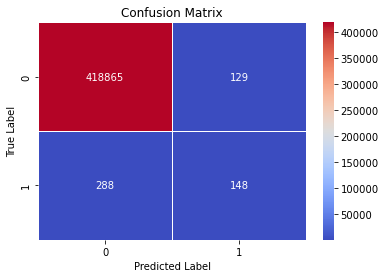

In [55]:
# Check prediction accuracy with a confusion matrix
cm = confusion_matrix(y_test, prediction1)
plt.figure(figsize=(6, 4))
sns.heatmap(cm,
cmap='coolwarm',
linecolor='white',
linewidths=1,
annot=True,
fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

 * True Positive 
 * False Positive 
 * True Negative 
 * False Negative
 
#### Precision: TP/(TP+FP)
 148/(148+129) = 0.5343
 
#### Recall : TP/(TP+FN)
148/(148+288) = 0.34

### Desicion Tree

In [63]:
dev_preds1 = DC.predict(X_train)

In [64]:
#development performance
print(classification_report(y_train,dev_preds1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    628439
           1       1.00      1.00      1.00       706

    accuracy                           1.00    629145
   macro avg       1.00      1.00      1.00    629145
weighted avg       1.00      1.00      1.00    629145



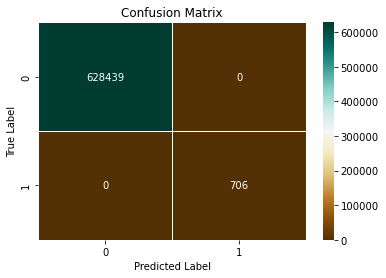

In [65]:
cm = confusion_matrix(y_train, dev_preds1)
plt.figure(figsize=(6, 4))
sns.heatmap(cm,
cmap='BrBG',
linecolor='white',
linewidths=1,
annot=True,
fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [66]:
print(classification_report(y_test,prediction2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    418994
           1       0.81      0.81      0.81       436

    accuracy                           1.00    419430
   macro avg       0.90      0.90      0.90    419430
weighted avg       1.00      1.00      1.00    419430



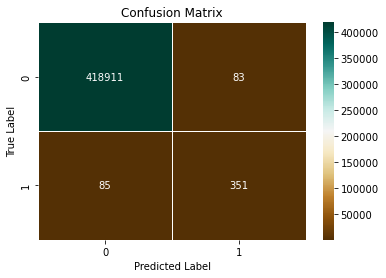

In [67]:
cm = confusion_matrix(y_test, prediction2)
plt.figure(figsize=(6, 4))
sns.heatmap(cm,
cmap='BrBG',
linecolor='white',
linewidths=1,
annot=True,
fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

 * True Positive 
 * False Positive 
 * True Negative 
 * False Negative
 
#### Precision: TP/(TP+FP)
 351/(351+83) = 0.809
 
#### Recall : TP/(TP+FN)
351/(351+85) = 0.805

### Random Forest

In [68]:
dev_preds2 = RF.predict(X_train)

In [69]:
#development performance
print(classification_report(y_train,dev_preds2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    628439
           1       1.00      1.00      1.00       706

    accuracy                           1.00    629145
   macro avg       1.00      1.00      1.00    629145
weighted avg       1.00      1.00      1.00    629145



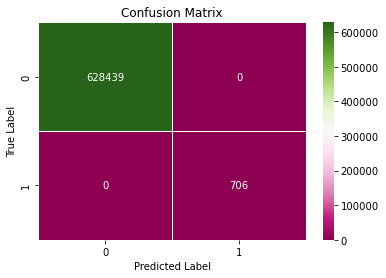

In [70]:
cm = confusion_matrix(y_train, dev_preds2)
plt.figure(figsize=(6, 4))
sns.heatmap(cm,
cmap='PiYG',
linecolor='white',
linewidths=1,
annot=True,
fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [71]:
print(classification_report(y_test,prediction3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    418994
           1       0.99      0.80      0.88       436

    accuracy                           1.00    419430
   macro avg       0.99      0.90      0.94    419430
weighted avg       1.00      1.00      1.00    419430



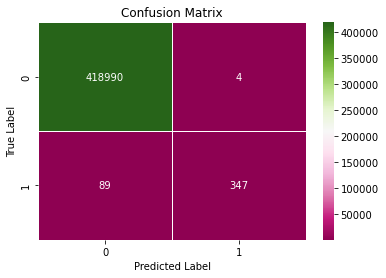

In [72]:
cm = confusion_matrix(y_test, prediction3)
plt.figure(figsize=(6, 4))
sns.heatmap(cm,
cmap='PiYG',
linecolor='white',
linewidths=1,
annot=True,
fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

 * True Positive 
 * False Positive 
 * True Negative 
 * False Negative
 
#### Precision: TP/(TP+FP)
 347/(347+4) = 0.989
 
#### Recall : TP/(TP+FN)
347/(347+89) = 0.796

The evaluation metrics used were classification report and confusion matrix. 
We can see that Decision Tree is the most suitable model with high recall of 0.81.
False Negatives are the most harmful classification in this project.
The bank should be concerned when the False Negatives are very high.